# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.tensorboard import SummaryWriter

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
data_pre_process = datasets.MNIST(root="data", train=True, download=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
data_pre_process.data[7]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105,
         255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [35]:
# Define transforms

def transform_data(train):
    
    
    # calculate mean and std first, without downloading the data
    # these can be different values for Test and Training sets 
    
    data_set = datasets.MNIST(root="data", train=train, download=True, transform=transforms.ToTensor())
    mean = (torch.mean(data_set.data.float()))
    std = (torch.std(data_set.data.float()))
    print(mean,std)
    #use mean and std to normalise plus auto augment to reduce overfitting
    
    transformations = transforms.Compose([transforms.AutoAugment(),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean,std),
                               ])

    data_set_norm = datasets.MNIST(root="data", train=train, download=True, transform=transformations)
    
    return data_set_norm



# Create training set and define training dataloader
training_data = transform_data(True)
test_data  = transform_data(False)


# Create test set and define test dataloader
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

tensor(33.3184) tensor(78.5675)
tensor(33.7912) tensor(79.1725)


In [34]:
training_data.data[7]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105,
         255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

## Justify your preprocessing

I just used auto augment to reduce the likelyhood of overfitting 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [83]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        #print(image.mode)
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [85]:
# Explore data
show5(test_loader)

TypeError: Only torch.uint8 image tensors are supported, but found torch.float32

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
28*28

784

In [9]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.dropout = nn.Dropout(0.2)
        self.layer1 = nn.Linear(28*28,32)
        self.layer2 = nn.Linear(32,10) 

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.layer1(x))
        #x = self.dropout(x)
        x = self.layer2(x) 
       
        return x



## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
def training(num_epochs,optimizer,criterion,net,train_loader):
    
    #check for GPU 
    if torch.cuda.is_available():
        # move tensor to CUDA
        device = torch.device("cuda")
        
    else:
        device = torch.device("cpu")

    net=net.to(device) 
    
    #tensorboard!!!
    #writer = SummaryWriter()
    
    #keep track of train and val loss:
    train_loss_history = list()
    val_loss_history = list()

    
    for epoch in range(num_epochs):
        
        net.train() # TRAIN MODE

        train_loss = 0.0
        train_correct = 0

        for i, data in enumerate(train_loader):

            # data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device) 

            # Zero out the gradients of the optimizer
            optimizer.zero_grad()

            # Get the outputs of your model and compute your loss
            outputs = net(inputs)
            #print(outputs.shape)
            #print(labels.shape)
            loss = criterion(outputs,labels)

            # Compute the loss gradient using the backward method and have the optimizer take a step
            loss.backward()
            
            #### TENSOR BOARD"
            """
            for name, param in net.named_parameters():
                
                writer.add_histogram(name + '_weights', param, epoch)
                writer.add_histogram(name + '_gradients', param.grad, epoch)
            """
            
            nn.utils.clip_grad_norm_(net.parameters(), 2)
            
            # actually updates the weights, taking into account the learn rate and momentum:
            optimizer.step()

            # Compute the accuracy and print the accuracy and loss
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss/len(train_loader))
        
        #writer.close()
        
        # Validation step 
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in test_loader:

            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs).to(device)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss/len(test_loader))
    
    
    return net, train_loss_history, val_loss_history

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0)
#optimizer = optim.Adam(net.parameters(), lr= 0.001)
criterion = nn.CrossEntropyLoss()


    
net, train_loss_history, val_loss_history = training(15,
                                                     optimizer,
                                                     criterion,
                                                     net,
                                                     train_loader)    
    

Epoch 1 training accuracy: 25.08% training loss: 0.91400
Epoch 1 validation accuracy: 28.42% validation loss: 0.42068
Epoch 2 training accuracy: 28.58% training loss: 0.38791
Epoch 2 validation accuracy: 28.95% validation loss: 0.33516
Epoch 3 training accuracy: 28.95% training loss: 0.33568
Epoch 3 validation accuracy: 29.20% validation loss: 0.30804
Epoch 4 training accuracy: 29.20% training loss: 0.30904
Epoch 4 validation accuracy: 29.45% validation loss: 0.28608
Epoch 5 training accuracy: 29.35% training loss: 0.29022
Epoch 5 validation accuracy: 29.50% validation loss: 0.27289
Epoch 6 training accuracy: 29.51% training loss: 0.27468
Epoch 6 validation accuracy: 29.58% validation loss: 0.26148
Epoch 7 training accuracy: 29.61% training loss: 0.26123
Epoch 7 validation accuracy: 29.72% validation loss: 0.24844


TypeError: int() argument must be a string, a bytes-like object or a number, not 'Image'

Plot the training loss (and validation loss/accuracy, if recorded).

In [ ]:
net.state_dict()

In [ ]:
! tensorboard --logdir=/path/to/log/directory

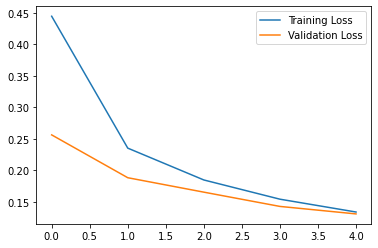

In [11]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##